11501568/11490434 [==============================] - 0s 0us/step
label:  1
dimenciones:  3
shape: :  (60000, 28, 28)
tipo:  uint8
(99, 28, 28)
(60000, 14, 14)
(60000, 14, 14)
(60000, 784)
(10000, 784)
(60000,)
5
(10000,)
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)
(10000, 10)


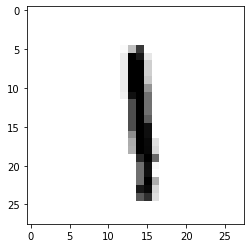

In [1]:

# Author: ALberto G Procopio
# Deep learning 

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt 

mnist = tf.keras.datasets.mnist
#x datos, y etiquetas
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test_Original = x_test
#print(x_train[8][5][13]) # adjunta txt de matriz mtxt1.txt
plt.imshow(x_train[8], cmap=plt.cm.binary)
print("label: ", y_train[8])
print("dimenciones: ", x_train.ndim)
print("shape: : ", x_train.shape)
print("tipo: ", x_train.dtype)

#Manipular datos 1 al 100
my_slice = x_train[1:100:, :] # equivalente a my_slice = x_train[1:100, 0:28, 0:28]
print(my_slice.shape)

#Todas las imagenes de 14x14 de la ezquina inferior derecha
my_slice = x_train[:, 14:, 14:]
print(my_slice.shape)

#Posicion Relativa
# centra la imagen
my_slice = x_train[:, 7:-7, 7:-7]
print(my_slice.shape)

#Normalizar 0-1 en flotante
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

#Convertir matriz en vector
#Es el fomato que acepta una red neuronal
x_train = x_train.reshape(60000, 784) #28*28 =784
x_test = x_test.reshape(10000,784)
print(x_train.shape)
print(x_test.shape)

#One-hot
#Vector de tantos ceros como numero de clases distintas
print(y_train.shape)
print(y_train[0])

print(y_test.shape)
print(y_test[0])

#Contiene el valor de 1 en el indice que corresponde a la etiqueta
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_test[0])
print(y_train[0])
print(y_train.shape)
print(y_test.shape)

In [2]:
#Definicion del modelo
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [3]:
#Proceso de Aprendizaje
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy']
)

In [4]:
#Entrenamiento del modelo
model.fit(x_train, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9186 - accuracy: 0.5104
Epoch 2/6
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3063 - accuracy: 0.7245
Epoch 3/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9549 - accuracy: 0.7867
Epoch 4/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7675 - accuracy: 0.8291
Epoch 5/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6548 - accuracy: 0.8543
Epoch 6/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5795 - accuracy: 0.8687


In [5]:
#Evaluacion del modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.5404 - accuracy: 0.8776
Test accuracy:  0.8776000142097473


Forma de lo que devuelve model.predict:  (10000, 10)
[0.0580718  0.00800459 0.01256543 0.40527356 0.0082295  0.3526184
 0.01151718 0.01168217 0.1217024  0.01033498]


0.99999994

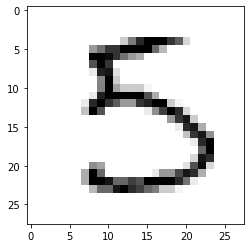

In [6]:
#Generacion de predicciones
plt.imshow(x_test_Original[15], cmap=plt.cm.binary) # ver por nosostros mismo el numero
predictions = model.predict(x_test)
print("Forma de lo que devuelve model.predict: ", predictions.shape)
print(predictions[15])
np.argmax(predictions[15])
np.sum(predictions[15])